# ДЗ4 (Оцениваемое)
## Задание №1
1. Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом.
2. Очистите текст от пунктуации, приведите его к нижнему регистру, лемматизируйте и запишите в новый файл. Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном по убыванию частотном словаре, а по оси Y - относительная частота (абсолютная частота, разделенная на количество слов в тексте). Т.е. у самого частотного слова будет ранг 1, у второго по частоте -- 2 и т.д.

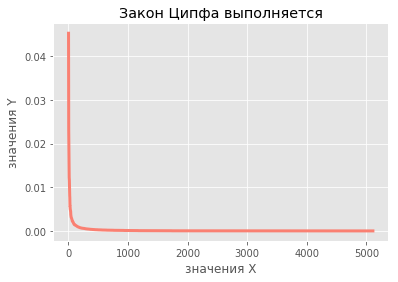

In [42]:
import os
os.chdir (r'D:\literature')
with open('harry_potter.txt','r',encoding='utf-8') as f:
    text = f.read()
    words = [word.strip("""!?.«»():‘’"";',—-""") for word in text.split()] #избавляемся от знаков препинания
    p = ' ' .join(words)
    final_text=(p.lower()) #приводим к нижнему регистру уже без пунктуации
with open('lemmas.txt','w',encoding='utf-8') as h:    
    import nltk
    from nltk.tokenize import word_tokenize
    token = word_tokenize(final_text) #токенезируем, чтобы лемматизировать
    from nltk import WordNetLemmatizer
    wnl = WordNetLemmatizer()
    lemmas = [wnl.lemmatize(x, pos='v') for x in token] #получаем список лемм
    text_chart=' ' .join(lemmas) #соединяем всё в текст
    h.write(text_chart)
    with open ('lemmas.txt','r',encoding='utf-8') as q:
        g = q.read() #новый файл записан и прочитан
        
from collections import Counter
counts = Counter (lemmas) #получили отсортированный по частотности список слов
mnogo = len(lemmas) #Общее кол-во слов в тексте
spisok = []
for s in counts.items():
    spisok.append((s[0], s[1] / mnogo))
otnositelnaya = sorted(spisok, key=lambda x: x[1], reverse=True) 
dlya_y=[x[1] for x in otnositelnaya] #получили координаты для Y

counts = {}
for word in lemmas: 
    if word in counts:
        counts[word] += 1
    else:
        counts[word] = 1
sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True) #получили частотный словарь, отсортированный по убыванию
dlya_x = []
pos=0
for word in sorted_counts:
    pos += 1
    dlya_x.append (pos) #получили порядковые номера или ранги слов (координаты для X)

import matplotlib.pyplot as plt
X = dlya_x
Y = dlya_y
from matplotlib import style
style.use('ggplot')
plt.plot(X, Y, c='salmon', linewidth=3)
plt.title('Закон Ципфа выполняется')
plt.ylabel('значения Y')
plt.xlabel('значения X')
plt.show()

3. Очистите текст от стоп-слов. Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

**NB!** На обоих графиках должны быть заголовки и подписи осей!

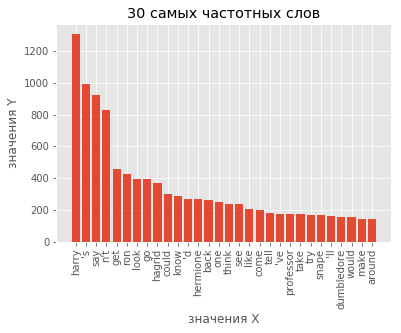

In [49]:
from nltk.corpus import stopwords
sw = stopwords.words('english')
filtered = [w for w in lemmas if w not in sw] #получили лемматизированный текст без стоп-слов
from collections import Counter
counts = Counter(filtered) #получили отсортированный по частотности список слов
spisok = [] 
for s in counts.items():
    spisok.append((s[0], s[1]))
sorted_spisok = sorted(spisok, key=lambda x: x[1], reverse=True) #сортируем, чтобы вывести 30 самых частотных слов
coord = sorted_spisok[:30]
words = [x[0] for x in coord] #получаем список 30 самых частотных слов для подписи оси X
numb = [x[1] for x in coord] #получаем список абсолютых частот 30 первых слов для координат оси Y
#строим график 
import matplotlib.pyplot as plt
Y = numb     
X = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
from matplotlib import style
style.use('ggplot')
plt.xticks(X, words, rotation=90)
plt.bar(X, Y)
plt.title('30 самых частотных слов')
plt.ylabel('значения Y')
plt.xlabel('значения X')
plt.show()